# Exploratory Data Analysis for World Happiness Report

Authors: Hannah Grace Smith, Matthew Zhang, Cameron Yenche
<br> Date: April 19, 2023

Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as py
%matplotlib inline

df = pd.read_csv("World Happiness Report.csv")
df.head()

Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   
2  Afghanistan         South Asia  2010     4.758381            7.613900   
3  Afghanistan         South Asia  2011     3.831719            7.581259   
4  Afghanistan         South Asia  2012     3.782938            7.660506   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   
2        0.539075                         51.099998   
3        0.521104                         51.400002   
4        0.520637                         51.700001   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.850035   
2                      0.600127    0.121316                   0.706766   
3                      0.495901    0.163571                   0.731109   
4                      0.530935    0.237588                   0.775620   

   Positive Affect  Negative Affect  Confidence In National Government  
0         0.414297         0.258195                           0.612072  
1         0.481421         0.237092                           0.611545  
2         0.516907         0.275324                           0.299357  
3         0.479835         0.267175                           0.307386  
4         0.613513         0.267919                           0.435440

## Initial Cleaning and Exploration

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       2199 non-null   object 
 1   Regional Indicator                 2087 non-null   object 
 2   Year                               2199 non-null   int64  
 3   Life Ladder                        2199 non-null   float64
 4   Log GDP Per Capita                 2179 non-null   float64
 5   Social Support                     2186 non-null   float64
 6   Healthy Life Expectancy At Birth   2145 non-null   float64
 7   Freedom To Make Life Choices       2166 non-null   float64
 8   Generosity                         2126 non-null   float64
 9   Perceptions Of Corruption          2083 non-null   float64
 10  Positive Affect                    2175 non-null   float64
 11  Negative Affect                    2183 non-null   float

In [3]:
df.shape

(2199, 13)

In [4]:
df.describe()

Year  Life Ladder  Log GDP Per Capita  Social Support  \
count  2199.000000  2199.000000         2179.000000     2186.000000   
mean   2014.161437     5.479226            9.389766        0.810679   
std       4.718736     1.125529            1.153387        0.120952   
min    2005.000000     1.281271            5.526723        0.228217   
25%    2010.000000     4.646750            8.499764        0.746609   
50%    2014.000000     5.432437            9.498955        0.835535   
75%    2018.000000     6.309460           10.373216        0.904792   
max    2022.000000     8.018934           11.663788        0.987343   

       Healthy Life Expectancy At Birth  Freedom To Make Life Choices  \
count                       2145.000000                   2166.000000   
mean                          63.294583                      0.747858   
std                            6.901104                      0.140150   
min                            6.720000                      0.257534   
25%                           59.119999                      0.656528   
50%                           65.050003                      0.769821   
75%                           68.500000                      0.859382   
max                           74.474998                      0.985178   

        Generosity  Perceptions Of Corruption  Positive Affect  \
count  2126.000000                2083.000000      2175.000000   
mean      0.000096                   0.745195         0.652143   
std       0.161083                   0.185837         0.105922   
min      -0.337527                   0.035198         0.178886   
25%      -0.112116                   0.688139         0.571684   
50%      -0.022671                   0.799654         0.663063   
75%       0.092070                   0.868827         0.737936   
max       0.702708                   0.983276         0.883586   

       Negative Affect  Confidence In National Government  
count      2183.000000                        1838.000000  
mean          0.271501                           0.483999  
std           0.086875                           0.193071  
min           0.082737                           0.068769  
25%           0.207660                           0.332549  
50%           0.260671                           0.467140  
75%           0.322894                           0.618846  
max           0.704590                           0.993604

### Sanity-checking the data

In [5]:
# Sanity check max and mins
columns_plot = ['Life Ladder','Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government', 'Year']

for column in columns_plot:
    print(column)
    print("Min value: ", df[f'{column}'].min())
    print("Max value: ", df[f'{column}'].max())
    print('-'*50)

Life Ladder
Min value:  1.2812711
Max value:  8.01893425
--------------------------------------------------
Log GDP Per Capita
Min value:  5.526723385
Max value:  11.66378784
--------------------------------------------------
Social Support
Min value:  0.228217229
Max value:  0.98734349
--------------------------------------------------
Healthy Life Expectancy At Birth
Min value:  6.71999979
Max value:  74.47499847
--------------------------------------------------
Freedom To Make Life Choices
Min value:  0.257533818
Max value:  0.985177755
--------------------------------------------------
Generosity
Min value:  -0.33752656
Max value:  0.702707887
--------------------------------------------------
Perceptions Of Corruption
Min value:  0.035197988
Max value:  0.98327601
--------------------------------------------------
Positive Affect
Min value:  0.178885803
Max value:  0.883586407
--------------------------------------------------
Negative Affect
Min value:  0.082736954
Max value:  0

Sanity check for affect - they should be close to opposite

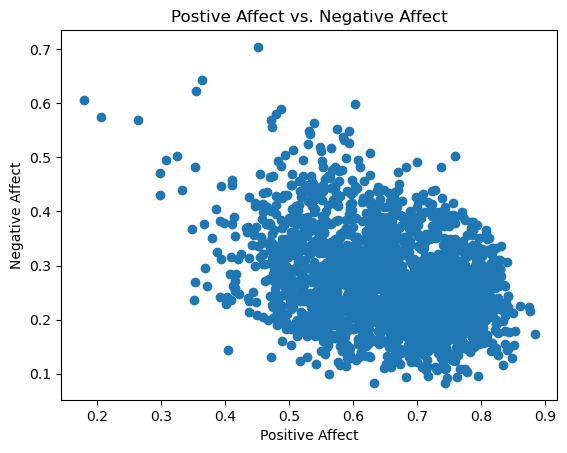

In [6]:
plt.scatter(df["Positive Affect"], df["Negative Affect"])
plt.title('Postive Affect vs. Negative Affect')
plt.xlabel('Positive Affect')
plt.ylabel('Negative Affect')
plt.show()

### Data Cleaning

Checking for duplicate values

In [7]:
print(df.duplicated().value_counts())
print("There are no duplicate values!")

False    2199
dtype: int64
There are no duplicate values!


Searching for nulls

In [8]:
df.isna().sum()

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

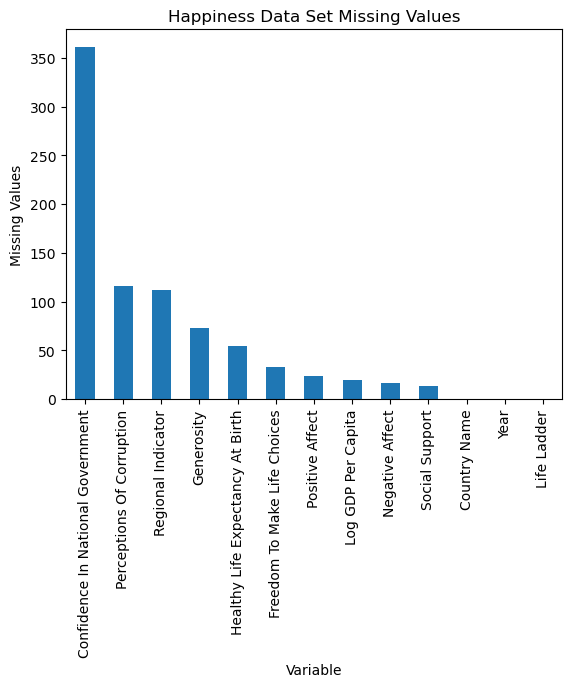

In [9]:
# NAs visualized
is_na = df.isna().sum().sort_values(ascending=False)
is_na.plot.bar()

plt.xlabel('Variable') # X-axis label
plt.ylabel('Missing Values') # Y-axis label
plt.title('Happiness Data Set Missing Values'); # Title and ; because it's outputting everything

Addressing missing values for 'Confidence In National Government'

In [10]:
# Will decide to drop
missing = df[['Confidence In National Government', 'Country Name']]
missing = missing.drop('Country Name', 1).isna().groupby(missing['Country Name'], sort=False).sum().reset_index()
missing = missing.sort_values(by = 'Confidence In National Government', ascending = False)
missing.columns = ['Country Name', 'Number of NAs in Confidence in National Government']
missing

/var/folders/90/y7jb8j8d35n5z4hw9s8_60g00000gn/T/ipykernel_16863/3027045413.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



Country Name  \
124               Saudi Arabia   
29                       China   
151                    Turkiye   
138         State of Palestine   
155       United Arab Emirates   
..                         ...   
61   Hong Kong S.A.R. of China   
137                  Sri Lanka   
132          Somaliland region   
135                South Sudan   
140                   Suriname   

     Number of NAs in Confidence in National Government  
124                                                 17   
29                                                  16   
151                                                 16   
138                                                 15   
155                                                 15   
..                                                 ...   
61                                                   0   
137                                                  0   
132                                                  0   
135                                                  0   
140                                                  0   

[165 rows x 2 columns]

Addressing missing values for 'Regional Indicator'

In [11]:
df[df['Regional Indicator'].isna()]

Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
39         Angola                NaN  2011     5.589001            8.944346   
40         Angola                NaN  2012     4.360250            8.988708   
41         Angola                NaN  2013     3.937107            8.999667   
42         Angola                NaN  2014     3.794838            9.009897   
179        Belize                NaN  2007     6.450644            9.191672   
...           ...                ...   ...          ...                 ...   
1991      Turkiye                NaN  2017     5.607262           10.224949   
1992      Turkiye                NaN  2018     5.185689           10.245586   
1993      Turkiye                NaN  2019     4.872074           10.245305   
1994      Turkiye                NaN  2020     4.861554           10.256719   
1995      Turkiye                NaN  2021     4.366640           10.356681   

      Social Support  Healthy Life Expectancy At Birth  \
39          0.723094                         51.220001   
40          0.752593                         51.840000   
41          0.721591                         52.459999   
42          0.754615                         53.080002   
179         0.872267                         64.300003   
...              ...                               ...   
1991        0.876468                         68.050003   
1992        0.847027                         68.224998   
1993        0.791656                         68.400002   
1994        0.856730                         68.574997   
1995        0.736195                         68.750000   

      Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
39                        0.583702    0.052619                   0.911320   
40                        0.456029   -0.138630                   0.906300   
41                        0.409555   -0.105992                   0.816375   
42                        0.374542   -0.170031                   0.834076   
179                       0.705306    0.008450                   0.768984   
...                            ...         ...                        ...   
1991                      0.644434   -0.240131                   0.670911   
1992                      0.528629   -0.179062                   0.804879   
1993                      0.631084   -0.139380                   0.760442   
1994                      0.510386   -0.117426                   0.774417   
1995                      0.446528   -0.036791                   0.810166   

      Positive Affect  Negative Affect  Confidence In National Government  
39           0.666833         0.361063                           0.232387  
40           0.590808         0.304890                           0.237091  
41           0.650047         0.370875                           0.547732  
42           0.595249         0.367864                           0.572346  
179          0.731540         0.250596                           0.255463  
...               ...              ...                                ...  
1991         0.393167         0.312846                                NaN  
1992         0.379292         0.350773                                NaN  
1993         0.347481         0.368089                                NaN  
1994         0.331563         0.440387                                NaN  
1995         0.297092         0.470579                                NaN  

[112 rows x 13 columns]

In [12]:
#Dictionary taken from Kaggle to assign Regional Indictor for missing null values in that column by country name.
country_region = {'Angola': 'Sub-Saharan Africa',
'Belize': 'Latin America and Caribbean',
'Bhutan': 'South Asia',
'Central African Republic': 'Sub-Saharan Africa',
'Congo (Kinshasa)': 'Sub-Saharan Africa',
'Cuba': 'Latin America and Caribbean',
'Czechia': 'Central and Eastern Europe',
'Djibouti': 'Middle East and North Africa',
'Eswatini': 'Sub-Saharan Africa',
'Guyana': 'Latin America and Caribbean',
'Oman': 'Middle East and North Africa',
'Qatar': 'Middle East and North Africa',
'Somalia': 'Middle East and North Africa',
'Somaliland region': 'Middle East and North Africa',
'South Sudan': 'Sub-Saharan Africa',
'State of Palestine': 'Middle East and North Africa',
'Sudan': 'Sub-Saharan Africa',
'Suriname': 'Latin America and Caribbean',
'Syria': 'Middle East and North Africa',
'Trinidad and Tobago': 'Latin America and Caribbean',
'Turkiye': 'Middle East and North Africa'}

for index, row in df.iterrows():
    if pd.isna(row['Regional Indicator']):
        indicator = country_region.get(row['Country Name'])
        df.loc[index, 'Regional Indicator'] = indicator

#No more null values for regional indicator
df[df['Regional Indicator'].isna()]

Empty DataFrame
Columns: [Country Name, Regional Indicator, Year, Life Ladder, Log GDP Per Capita, Social Support, Healthy Life Expectancy At Birth, Freedom To Make Life Choices, Generosity, Perceptions Of Corruption, Positive Affect, Negative Affect, Confidence In National Government]
Index: []

In [13]:
df.isna().sum()

Country Name                           0
Regional Indicator                     0
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

In [14]:
df.head(2)

Country Name Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
0  Afghanistan         South Asia  2008     3.723590            7.350416   
1  Afghanistan         South Asia  2009     4.401778            7.508646   

   Social Support  Healthy Life Expectancy At Birth  \
0        0.450662                         50.500000   
1        0.552308                         50.799999   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.718114    0.167652                   0.881686   
1                      0.678896    0.190809                   0.850035   

   Positive Affect  Negative Affect  Confidence In National Government  
0         0.414297         0.258195                           0.612072  
1         0.481421         0.237092                           0.611545

Addressing missing values using imputation

In [17]:
def fill_na_mean(data, col_list):
    '''
    Write a function to fill the nulls of EACH column based on the mean of that column BY respective Country!
    '''
    for col in col_list:
        col_df = data.groupby('Country Name')[col].mean()
        col_df.to_dict()
        data[col] = data[col].fillna(data['Country Name'].map(col_df))

cols = ['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
        'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 
        'Confidence In National Government']

fill_na_mean(df, cols)
df.isna().sum()

Country Name                           0
Regional Indicator                     0
Year                                   0
Life Ladder                            0
Log GDP Per Capita                     9
Social Support                         1
Healthy Life Expectancy At Birth      32
Freedom To Make Life Choices           0
Generosity                             9
Perceptions Of Corruption             29
Positive Affect                        2
Negative Affect                        1
Confidence In National Government    130
dtype: int64

Drop all remaining null values

In [18]:
df.dropna(inplace=True)
df.isna().sum()

Country Name                         0
Regional Indicator                   0
Year                                 0
Life Ladder                          0
Log GDP Per Capita                   0
Social Support                       0
Healthy Life Expectancy At Birth     0
Freedom To Make Life Choices         0
Generosity                           0
Perceptions Of Corruption            0
Positive Affect                      0
Negative Affect                      0
Confidence In National Government    0
dtype: int64

In [19]:
df.shape

(2032, 13)

Though we dropped around 200 rows, we still have a lot of data to work with. 

## Exploratory Data Analysis

Looking at distributions for each variable

Our variables are fairly normally distributed, with a few variables that a right and left skewed.

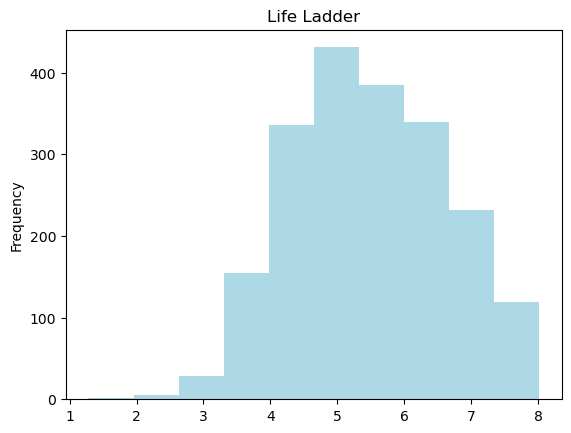

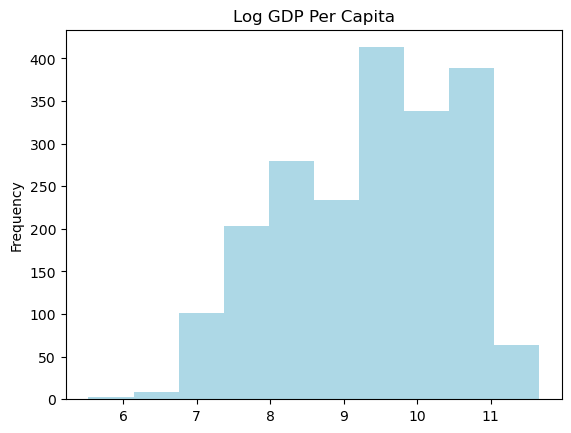

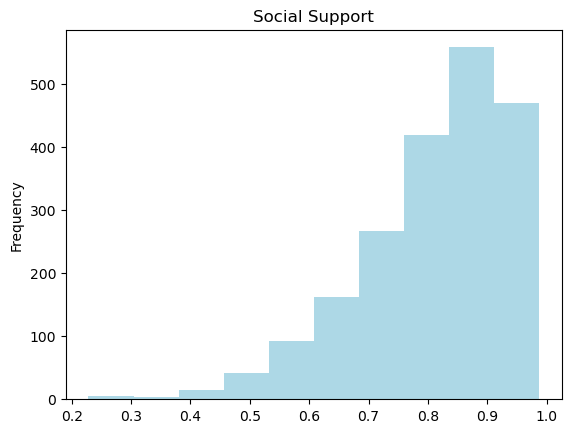

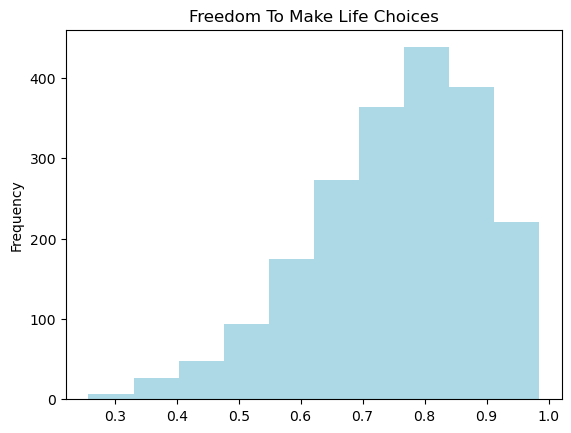

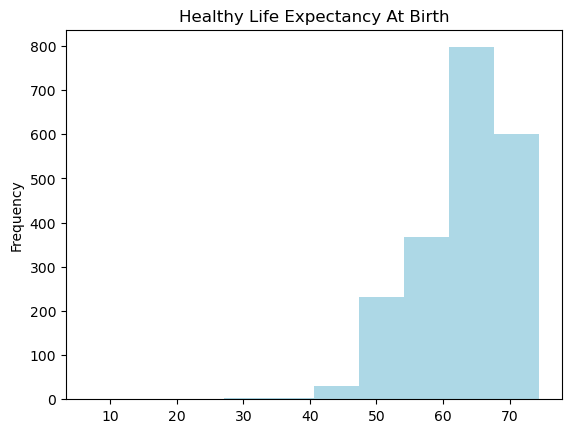

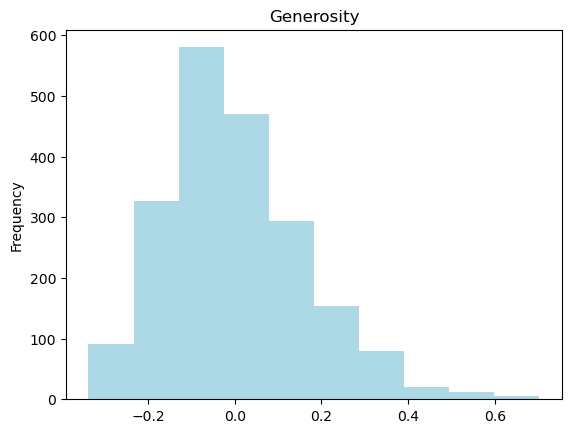

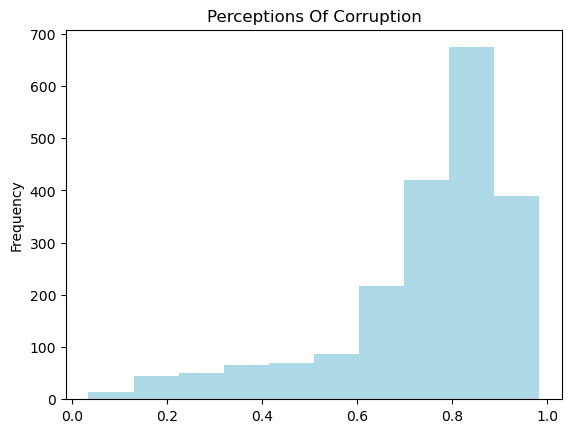

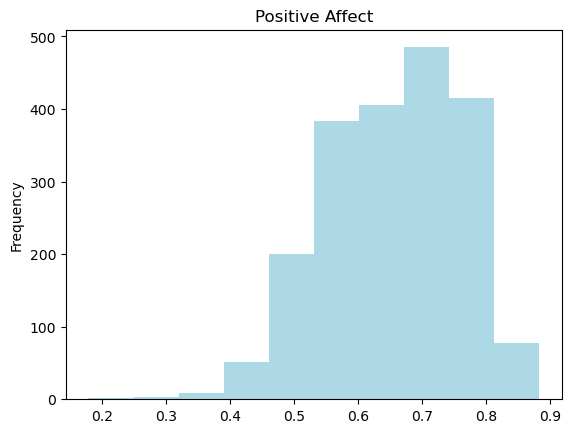

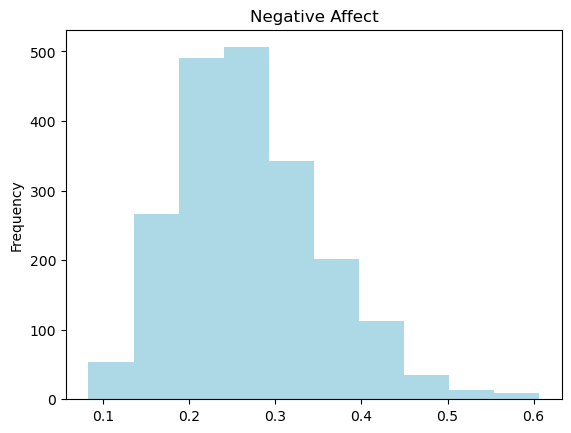

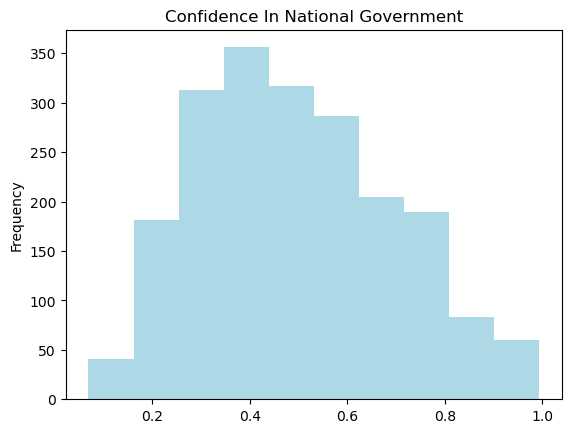

In [20]:
cols = ['Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Freedom To Make Life Choices', 'Healthy Life Expectancy At Birth',
        'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 'Confidence In National Government']

for col in cols:
    df[col].plot.hist(color = "lightblue")
    plt.title(col)
    plt.show()

Looking at average 'Log GDP Per Capita' and visualizing

The average log GDP per capita for all countries is 9.356318215146104


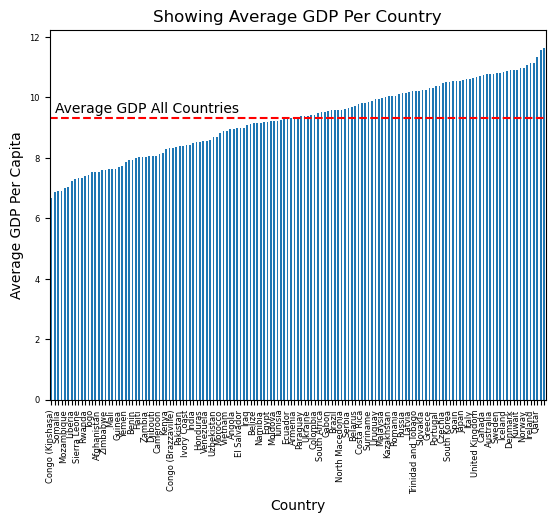

In [22]:
a_gdp = (df['Log GDP Per Capita'].sum())/len(df['Log GDP Per Capita'])
print("The average log GDP per capita for all countries is", a_gdp)

def av_gdp(df):
    all_values = df['Log GDP Per Capita'].sum()
    total_number = len(df['Log GDP Per Capita'])
    average = all_values/total_number
    return(average)

grouped_gdp = df.groupby('Country Name').apply(av_gdp)
grouped_gdp = grouped_gdp.sort_values()
plot = grouped_gdp.plot.bar()
plot
plt.axhline(9.3, color='r', linestyle='--', label = 'Average GDP')
plt.xticks(rotation=90, ha='right')
plt.tick_params(labelsize=6)

plt.xlabel('Country') # X-axis label
plt.ylabel('Average GDP Per Capita') # Y-axis label
plt.title('Showing Average GDP Per Country');
plt.text(1,9.5, 'Average GDP All Countries')

for label in plot.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)


### What countries are the happiest? The least happy?

How many unique countries are there?

In [23]:
df['Country Name'].nunique()

147

How many unique regions are there?

In [24]:
df['Regional Indicator'].unique()

array(['South Asia', 'Central and Eastern Europe', 'Sub-Saharan Africa',
       'Latin America and Caribbean',
       'Commonwealth of Independent States', 'North America and ANZ',
       'Western Europe', 'Southeast Asia', 'Middle East and North Africa',
       'East Asia'], dtype=object)

TOP 10 HAPPIEST COUNTRIES

(0.0, 8.0)

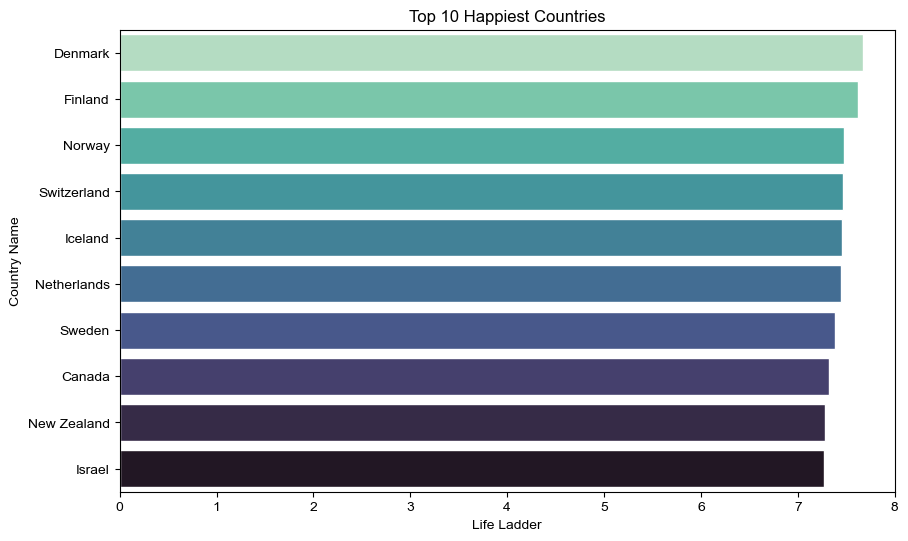

In [25]:
top_countries = df.groupby('Country Name')['Life Ladder'].mean().round(2).nlargest(10).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style = 'whitegrid')  
palette = sns.color_palette("mako", n_colors = 10)
palette.reverse()
sns.barplot(ax = ax, data = top_countries , x = top_countries['Life Ladder'], y = top_countries['Country Name'], palette = palette)
ax.set_title('Top 10 Happiest Countries')
ax.set_xlim(0, 8)

TOP TEN LEAST HAPPY COUNTRIES

(0.0, 8.0)

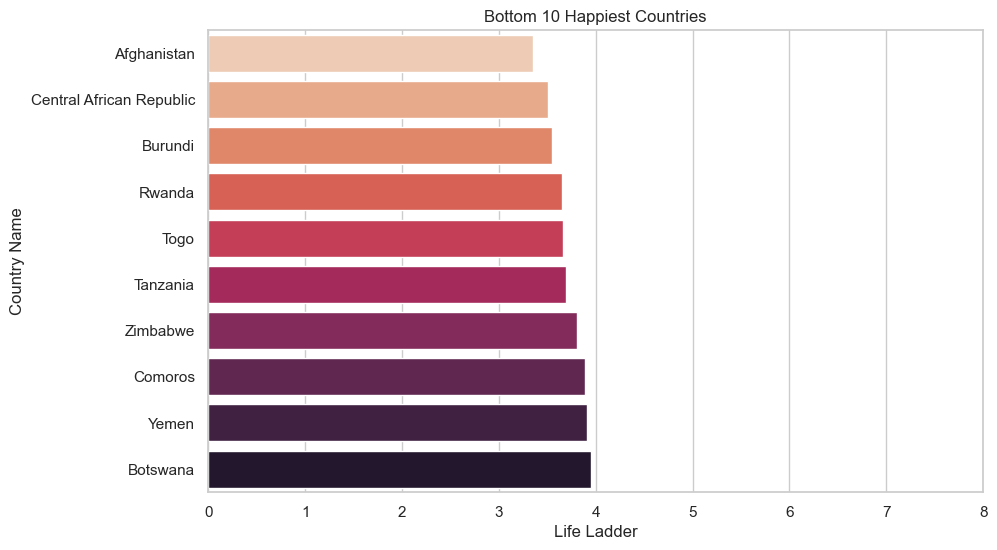

In [26]:
top_countries = df.groupby('Country Name')['Life Ladder'].mean().round(2).nsmallest(10).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style = 'whitegrid')  
palette = sns.color_palette("rocket", n_colors = 10)
palette.reverse()
sns.barplot(ax = ax, data = top_countries , x = top_countries['Life Ladder'], y = top_countries['Country Name'], palette = palette)
ax.set_title('Bottom 10 Happiest Countries')
ax.set_xlim(0, 8)


### Do we notice any regional patterns when we visualize the data?

In [27]:
df_plot = pd.DataFrame(df.groupby('Country Name')['Life Ladder'].mean().reset_index())

fig = px.choropleth(df_plot, 
                    locations = "Country Name", 
                    color = "Life Ladder",
                    locationmode = "country names",
                    color_continuous_scale= 'Viridis')

fig.update_layout(title = "Average Life Ladder by Country")
fig.show()

What are the top ranked regions?

Text(0.5, 1.0, 'Ranked Regional Happiness')

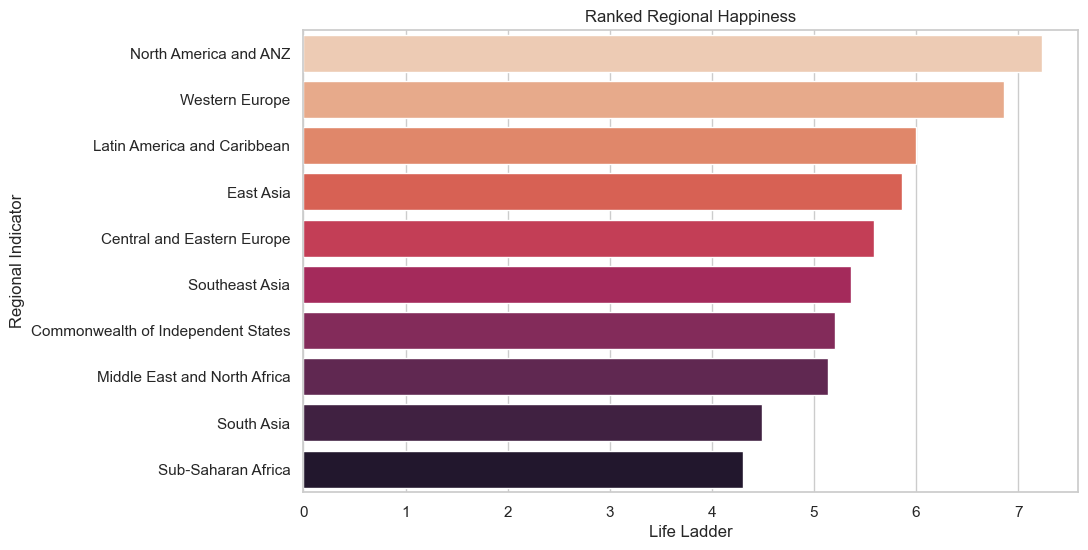

In [28]:
top_regions = df.groupby('Regional Indicator')['Life Ladder'].mean().round(2).nlargest(10).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style = 'whitegrid')  
palette = sns.color_palette("rocket", n_colors = 10)
palette.reverse()
sns.barplot(ax = ax, data = top_regions , x = top_regions['Life Ladder'], y = top_regions['Regional Indicator'], palette = palette)
ax.set_title('Ranked Regional Happiness')


### What are the richest countries?

Text(0.5, 1.0, 'Top 10 Country GDP')

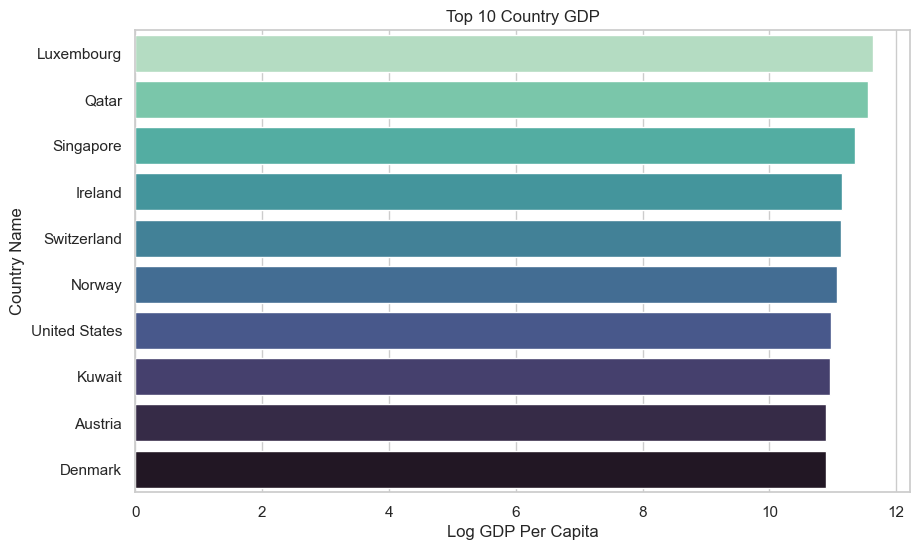

In [29]:
country_gdp = df.groupby('Country Name')['Log GDP Per Capita'].mean().round(2).nlargest(10).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style = 'whitegrid')  
palette = sns.color_palette("mako", n_colors = 10)
palette.reverse()
sns.barplot(ax = ax, data = country_gdp , x = country_gdp['Log GDP Per Capita'], y = country_gdp['Country Name'], palette = palette)
ax.set_title('Top 10 Country GDP')

### What countries have the most social support?

Text(0.5, 1.0, 'Top 10 Country SS')

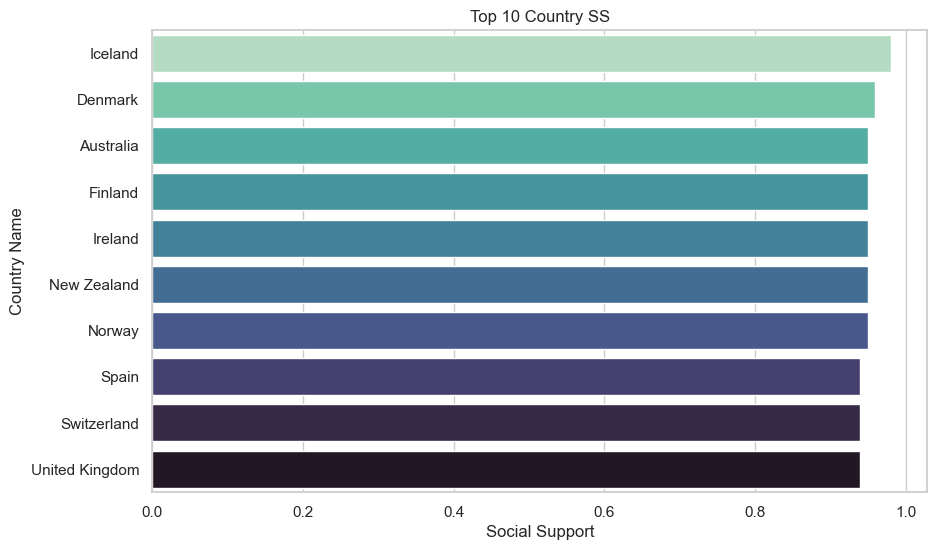

In [30]:
country_ss = df.groupby('Country Name')['Social Support'].mean().round(2).nlargest(10).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style = 'whitegrid')  
palette = sns.color_palette("mako", n_colors = 10)
palette.reverse()
sns.barplot(ax = ax, data = country_ss , x = country_ss['Social Support'], y = country_ss['Country Name'], palette = palette)
ax.set_title('Top 10 Country SS')

### What are the most corrupted countries?

Text(0.5, 1.0, 'Top 10 Corrupted Countries')

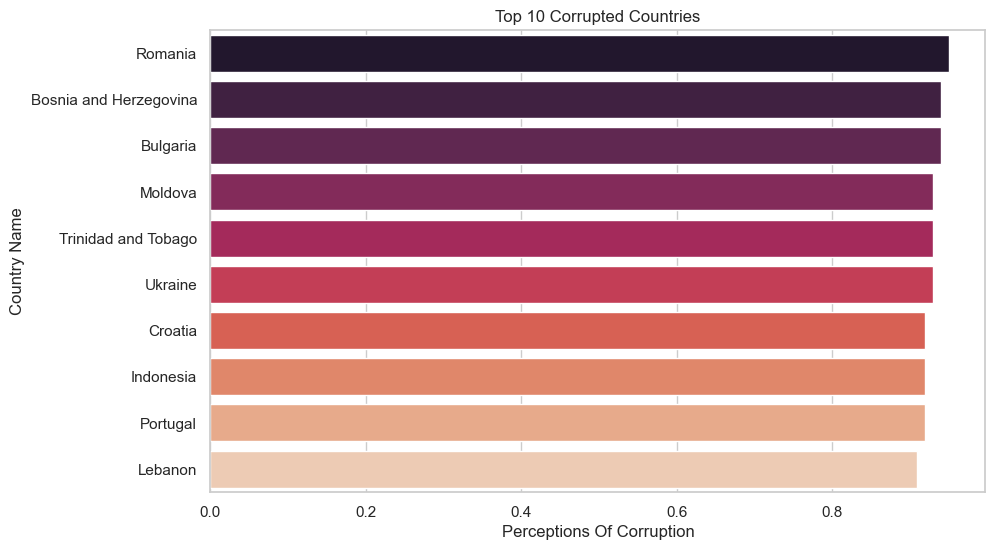

In [31]:
country_corruption = df.groupby('Country Name')['Perceptions Of Corruption'].mean().round(2).nlargest(10).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style = 'whitegrid')  
palette = sns.color_palette("rocket_r", n_colors = 10)
palette.reverse()
sns.barplot(ax = ax, data = country_corruption , x = country_corruption['Perceptions Of Corruption'], y = country_corruption['Country Name'], palette = palette)
ax.set_title('Top 10 Corrupted Countries')

### What other correlations can we see?

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')

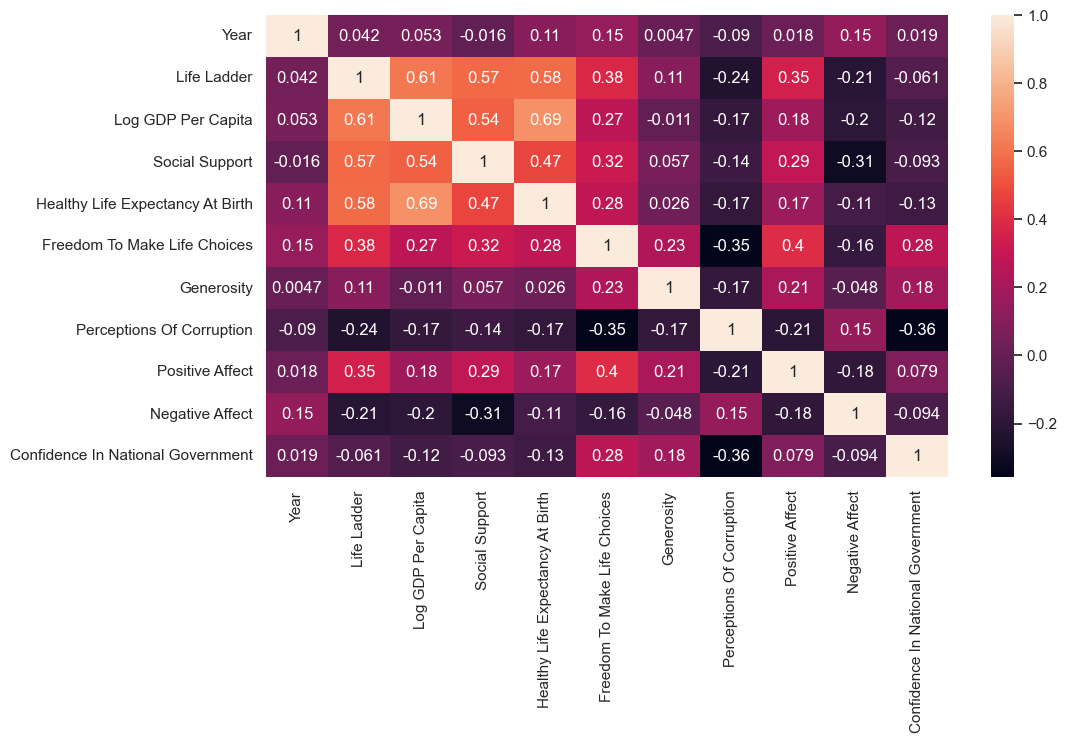

In [32]:
corr = df.corr(method='kendall')
plt.figure(figsize=(11,6))
sns.heatmap(corr, annot=True)
df.columns

### What variables are most highly correlated with happiness?

Text(0.5, 1.0, 'Correlation With Happiness')

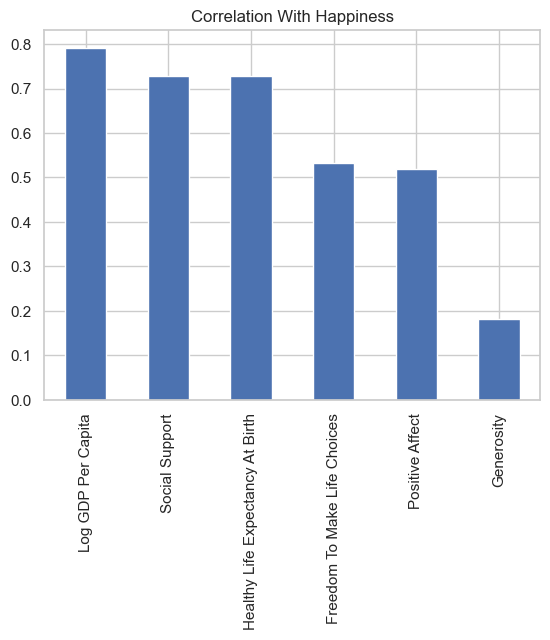

In [33]:
features = list(['Life Ladder','Log GDP Per Capita','Social Support','Healthy Life Expectancy At Birth','Freedom To Make Life Choices','Positive Affect','Generosity'])
corr = df[features].corr()
axes = corr.iloc[1:, 0].plot(kind = 'bar')
axes.set_title("Correlation With Happiness")


<AxesSubplot: xlabel='Life Ladder', ylabel='Generosity'>

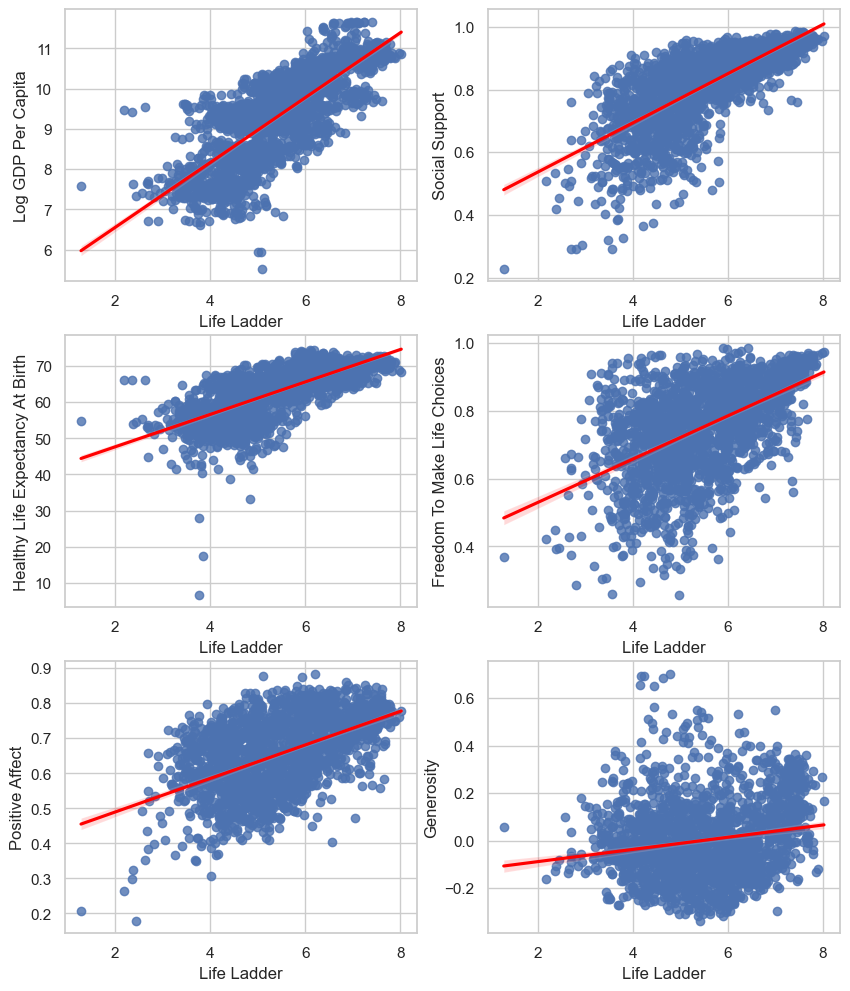

In [34]:
fig, axes = plt.subplots(3,2,figsize=(10, 12))

sns.regplot(ax =axes[0,0],data = df, x = 'Life Ladder', y='Log GDP Per Capita',line_kws={"color": "red"} )

sns.regplot(ax =axes[0,1],data = df, x = 'Life Ladder', y='Social Support',line_kws={"color": "red"} )

sns.regplot(ax =axes[1,0],data = df, x = 'Life Ladder', y='Healthy Life Expectancy At Birth',line_kws={"color": "red"} )

sns.regplot(ax =axes[1,1],data = df, x = 'Life Ladder', y='Freedom To Make Life Choices',line_kws={"color": "red"} )

sns.regplot(ax =axes[2,0],data = df, x = 'Life Ladder', y='Positive Affect',line_kws={"color": "red"} )

sns.regplot(ax =axes[2,1],data = df, x = 'Life Ladder', y='Generosity',line_kws={"color": "red"} )

## Exploring a multivariate regression

In [35]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [36]:
print(df.columns)

Index(['Country Name', 'Regional Indicator', 'Year', 'Life Ladder',
       'Log GDP Per Capita', 'Social Support',
       'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
       'Generosity', 'Perceptions Of Corruption', 'Positive Affect',
       'Negative Affect', 'Confidence In National Government'],
      dtype='object')


In [37]:
x = pd.get_dummies(df, columns=['Regional Indicator'], drop_first=True).drop(columns=['Country Name', 'Life Ladder'])
y = df['Life Ladder']
X = sm.add_constant(x)
eq01 = sm.OLS(y,X).fit()
print(eq01.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     447.8
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:47:17   Log-Likelihood:                -1473.3
No. Observations:                2032   AIC:                             2987.
Df Residuals:                    2012   BIC:                             3099.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

## S&P Data

In [38]:
snp_df = pd.read_csv('SNP_Max.csv')
snp_df.head()

Date  Close/Last Volume     Open     High      Low
0  04/14/2023     4137.64     --  4140.11  4163.19  4113.20
1  04/13/2023     4146.22     --  4100.04  4150.26  4099.40
2  04/12/2023     4091.95     --  4121.72  4134.37  4086.94
3  04/11/2023     4108.94     --  4110.29  4124.26  4102.61
4  04/10/2023     4109.11     --  4085.20  4109.50  4072.55

In [39]:
snp_df.tail()

Date  Close/Last Volume     Open     High      Low
2536  04/22/2013     1562.50     --  1555.25  1565.55  1548.19
2537  04/19/2013     1555.25     --  1541.61  1555.89  1539.40
2538  04/18/2013     1541.61     --  1552.03  1554.38  1536.03
2539  04/17/2013     1552.01     --  1574.57  1574.57  1543.69
2540  04/16/2013     1574.57     --  1552.36  1575.35  1552.36

### Preparing and cleaning

Reordering dataframe from earliest date

In [40]:
snp_df = snp_df.iloc[::-1]
snp_df.head()

Date  Close/Last Volume     Open     High      Low
2540  04/16/2013     1574.57     --  1552.36  1575.35  1552.36
2539  04/17/2013     1552.01     --  1574.57  1574.57  1543.69
2538  04/18/2013     1541.61     --  1552.03  1554.38  1536.03
2537  04/19/2013     1555.25     --  1541.61  1555.89  1539.40
2536  04/22/2013     1562.50     --  1555.25  1565.55  1548.19

Visualizing the data

Text(0.5, 1.0, 'The Stock Price of S&P')

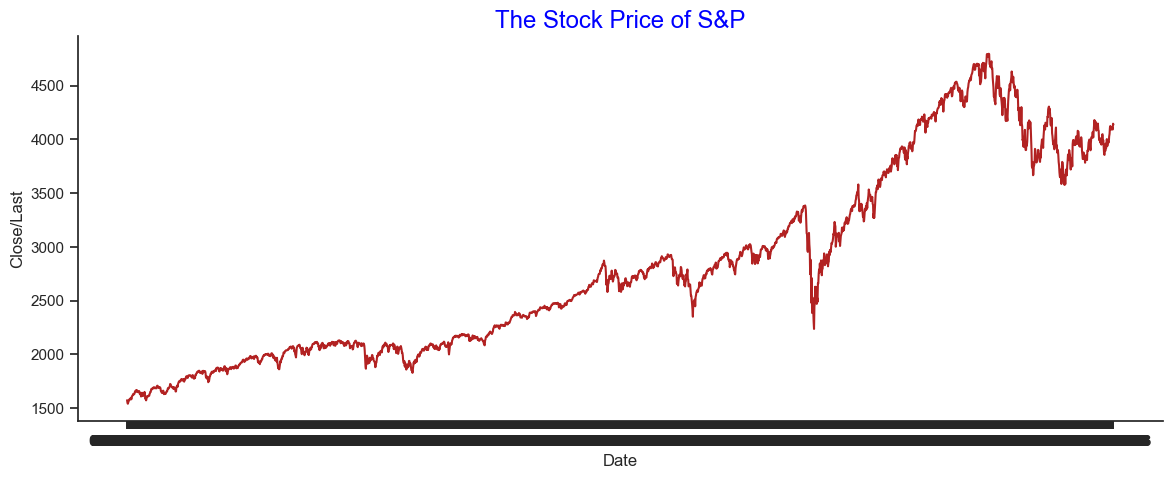

In [41]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data = snp_df, x = "Date", y = 'Close/Last', color = 'firebrick')
sns.despine()
plt.title("The Stock Price of S&P", size = 'x-large', color = 'blue')

In [42]:
snp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 2540 to 0
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2541 non-null   object 
 1   Close/Last  2541 non-null   float64
 2   Volume      2541 non-null   object 
 3   Open        2541 non-null   float64
 4   High        2541 non-null   float64
 5   Low         2541 non-null   float64
dtypes: float64(4), object(2)
memory usage: 119.2+ KB


In [43]:
df.tail(2)

Country Name  Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
2197     Zimbabwe  Sub-Saharan Africa  2021     3.154578            7.656878   
2198     Zimbabwe  Sub-Saharan Africa  2022     3.296220            7.670123   

      Social Support  Healthy Life Expectancy At Birth  \
2197        0.685151                         54.049999   
2198        0.666172                         54.525002   

      Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
2197                      0.667636   -0.075575                   0.756945   
2198                      0.651987   -0.069513                   0.752632   

      Positive Affect  Negative Affect  Confidence In National Government  
2197         0.609917         0.241682                           0.665703  
2198         0.640609         0.191350                           0.476866

Consolidating dates (filtering WHR data to match S&P data from 2013)

In [44]:
whr_2013 = df[df['Year'] > 2012]
whr_2013

Country Name  Regional Indicator  Year  Life Ladder  Log GDP Per Capita  \
5     Afghanistan          South Asia  2013     3.572100            7.680333   
6     Afghanistan          South Asia  2014     3.130896            7.670638   
7     Afghanistan          South Asia  2015     3.982855            7.653833   
8     Afghanistan          South Asia  2016     4.220169            7.650370   
9     Afghanistan          South Asia  2017     2.661718            7.647830   
...           ...                 ...   ...          ...                 ...   
2194     Zimbabwe  Sub-Saharan Africa  2018     3.616480            7.783066   
2195     Zimbabwe  Sub-Saharan Africa  2019     2.693523            7.697755   
2196     Zimbabwe  Sub-Saharan Africa  2020     3.159802            7.596050   
2197     Zimbabwe  Sub-Saharan Africa  2021     3.154578            7.656878   
2198     Zimbabwe  Sub-Saharan Africa  2022     3.296220            7.670123   

      Social Support  Healthy Life Expectancy At Birth  \
5           0.483552                         52.000000   
6           0.525568                         52.299999   
7           0.528597                         52.599998   
8           0.559072                         52.924999   
9           0.490880                         53.250000   
...              ...                               ...   
2194        0.775388                         52.625000   
2195        0.759162                         53.099998   
2196        0.717243                         53.575001   
2197        0.685151                         54.049999   
2198        0.666172                         54.525002   

      Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
5                         0.577955    0.062666                   0.823204   
6                         0.508514    0.105755                   0.871242   
7                         0.388928    0.081652                   0.880638   
8                         0.522566    0.043916                   0.793246   
9                         0.427011   -0.119410                   0.954393   
...                            ...         ...                        ...   
2194                      0.762675   -0.051219                   0.844209   
2195                      0.631908   -0.047464                   0.830652   
2196                      0.643303    0.006313                   0.788523   
2197                      0.667636   -0.075575                   0.756945   
2198                      0.651987   -0.069513                   0.752632   

      Positive Affect  Negative Affect  Confidence In National Government  
5            0.547417         0.273328                           0.482847  
6            0.491641         0.374861                           0.409048  
7            0.491410         0.339276                           0.260557  
8            0.501409         0.348332                           0.324990  
9            0.435270         0.371326                           0.261179  
...               ...              ...                                ...  
2194         0.657524         0.211726                           0.550508  
2195         0.658434         0.235354                           0.456455  
2196         0.660658         0.345736                           0.577302  
2197         0.609917         0.241682                           0.665703  
2198         0.640609         0.191350                           0.476866  

[1250 rows x 13 columns]

Grouping WHR data by 'Year'

In [45]:
whr_mean = whr_2013.groupby('Year')['Life Ladder', 'Log GDP Per Capita', 'Social Support', 
                                    'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices',
                                    'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect',
                                    'Confidence In National Government'].mean()
whr_mean

Life Ladder  Log GDP Per Capita  Social Support  \
Year                                                    
2013     5.389802            9.362074        0.807618   
2014     5.383109            9.330246        0.807385   
2015     5.408266            9.361236        0.800216   
2016     5.387984            9.337809        0.811660   
2017     5.461728            9.336350        0.804727   
2018     5.501802            9.353802        0.809149   
2019     5.561741            9.402461        0.813682   
2020     5.717993            9.586536        0.821881   
2021     5.626266            9.558312        0.802535   
2022     5.568342            9.500763        0.795705   

      Healthy Life Expectancy At Birth  Freedom To Make Life Choices  \
Year                                                                   
2013                         63.113228                      0.730796   
2014                         63.121364                      0.742368   
2015                         63.472824                      0.755992   
2016                         63.431512                      0.763884   
2017                         63.569926                      0.784764   
2018                         63.791717                      0.783750   
2019                         64.100303                      0.796182   
2020                         65.513796                      0.810913   
2021                         65.374696                      0.790400   
2022                         65.317409                      0.789350   

      Generosity  Perceptions Of Corruption  Positive Affect  Negative Affect  \
Year                                                                            
2013   -0.001783                   0.762423         0.657200         0.267401   
2014    0.018842                   0.737923         0.661368         0.269584   
2015    0.017385                   0.730084         0.663230         0.273051   
2016   -0.000152                   0.744264         0.659784         0.283623   
2017   -0.007411                   0.729225         0.652367         0.289348   
2018   -0.027844                   0.733578         0.655394         0.293415   
2019   -0.024272                   0.721825         0.658820         0.287898   
2020   -0.006230                   0.727489         0.668592         0.303350   
2021    0.034131                   0.726113         0.657793         0.292649   
2022    0.027041                   0.719412         0.657347         0.294466   

      Confidence In National Government  
Year                                     
2013                           0.466181  
2014                           0.491326  
2015                           0.494439  
2016                           0.485496  
2017                           0.512074  
2018                           0.512069  
2019                           0.518335  
2020                           0.513444  
2021                           0.500099  
2022                           0.478314

Grouping S&P data by 'Year'

In [46]:
snp_df['Year'] = pd.DatetimeIndex(snp_df['Date']).year
snp_mean = snp_df.groupby('Year')['Close/Last'].mean()
snp_mean

Year
2013    1691.847903
2014    1931.576130
2015    2060.939693
2016    2094.651310
2017    2449.076375
2018    2746.214024
2019    2913.357937
2020    3217.855929
2021    4273.406627
2022    4098.514741
2023    4014.343239
Name: Close/Last, dtype: float64

Merging the data frames

In [47]:
whr_snp = pd.concat([whr_mean, snp_mean], axis = 1).reset_index().drop(10)
whr_snp

Year  Life Ladder  Log GDP Per Capita  Social Support  \
0  2013     5.389802            9.362074        0.807618   
1  2014     5.383109            9.330246        0.807385   
2  2015     5.408266            9.361236        0.800216   
3  2016     5.387984            9.337809        0.811660   
4  2017     5.461728            9.336350        0.804727   
5  2018     5.501802            9.353802        0.809149   
6  2019     5.561741            9.402461        0.813682   
7  2020     5.717993            9.586536        0.821881   
8  2021     5.626266            9.558312        0.802535   
9  2022     5.568342            9.500763        0.795705   

   Healthy Life Expectancy At Birth  Freedom To Make Life Choices  Generosity  \
0                         63.113228                      0.730796   -0.001783   
1                         63.121364                      0.742368    0.018842   
2                         63.472824                      0.755992    0.017385   
3                         63.431512                      0.763884   -0.000152   
4                         63.569926                      0.784764   -0.007411   
5                         63.791717                      0.783750   -0.027844   
6                         64.100303                      0.796182   -0.024272   
7                         65.513796                      0.810913   -0.006230   
8                         65.374696                      0.790400    0.034131   
9                         65.317409                      0.789350    0.027041   

   Perceptions Of Corruption  Positive Affect  Negative Affect  \
0                   0.762423         0.657200         0.267401   
1                   0.737923         0.661368         0.269584   
2                   0.730084         0.663230         0.273051   
3                   0.744264         0.659784         0.283623   
4                   0.729225         0.652367         0.289348   
5                   0.733578         0.655394         0.293415   
6                   0.721825         0.658820         0.287898   
7                   0.727489         0.668592         0.303350   
8                   0.726113         0.657793         0.292649   
9                   0.719412         0.657347         0.294466   

   Confidence In National Government   Close/Last  
0                           0.466181  1691.847903  
1                           0.491326  1931.576130  
2                           0.494439  2060.939693  
3                           0.485496  2094.651310  
4                           0.512074  2449.076375  
5                           0.512069  2746.214024  
6                           0.518335  2913.357937  
7                           0.513444  3217.855929  
8                           0.500099  4273.406627  
9                           0.478314  4098.514741

### Visualizations

<AxesSubplot: xlabel='Close/Last', ylabel='Confidence In National Government'>

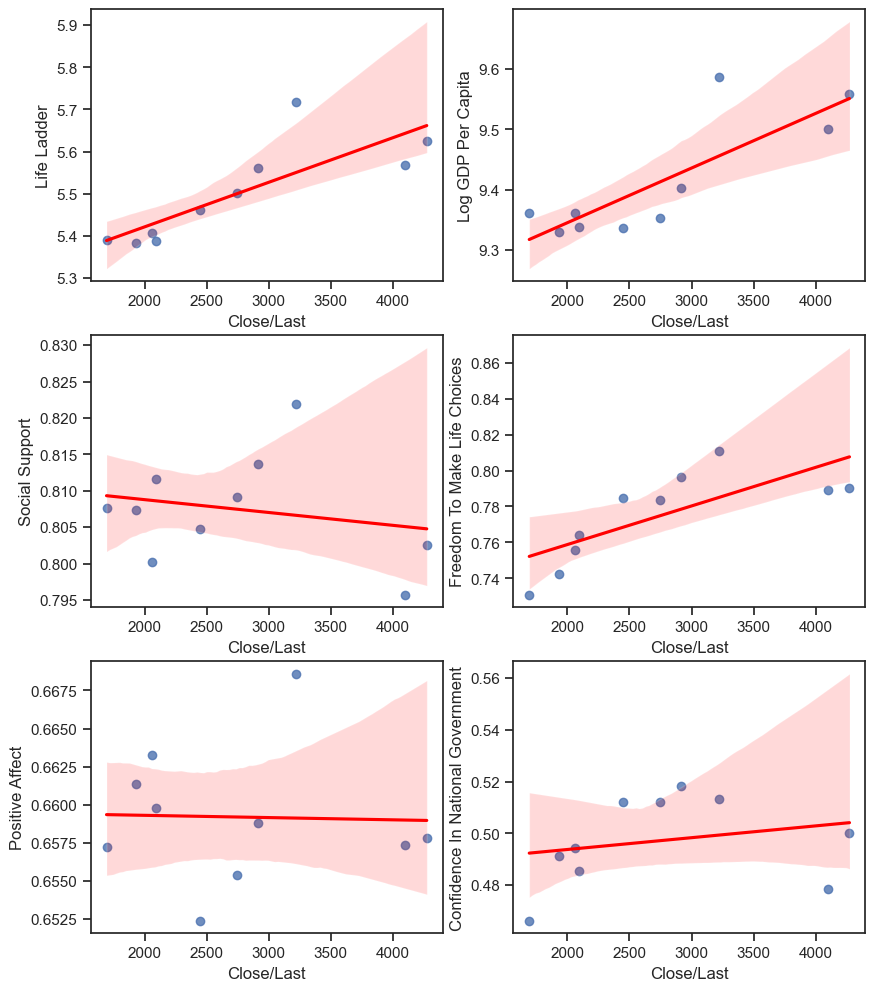

In [48]:
fig, axes = plt.subplots(3,2,figsize=(10, 12))

sns.regplot(ax =axes[0,0], data = whr_snp, x = 'Close/Last', y='Life Ladder',line_kws={"color": "red"} )

sns.regplot(ax =axes[0,1], data = whr_snp, x = 'Close/Last', y='Log GDP Per Capita',line_kws={"color": "red"} )

sns.regplot(ax =axes[1,0], data = whr_snp, x = 'Close/Last', y='Social Support',line_kws={"color": "red"} )

sns.regplot(ax =axes[1,1], data = whr_snp, x = 'Close/Last', y='Freedom To Make Life Choices',line_kws={"color": "red"} )

sns.regplot(ax =axes[2,0], data = whr_snp, x = 'Close/Last', y='Positive Affect',line_kws={"color": "red"} )

sns.regplot(ax =axes[2,1], data = whr_snp, x = 'Close/Last', y='Confidence In National Government',line_kws={"color": "red"} )
